## 安装 Darts

In [2]:
# !pip install darts

## 载入 Darts

In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.utils.missing_values import fill_missing_values

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## TimeSeries 对象

* 构建
   * TimeSeries.from_dataframe()
    * TimeSeries.from_times_and_values()
    * TimeSeries.from_values()
    * TimeSeries.from_series()
    * TimeSeries.from_xarray()
    * TimeSeries.from_csv()
* 操作

### AirPassengersDataset

In [60]:
series = AirPassengersDataset().load()
series

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
series.columns

Index(['#Passengers'], dtype='object', name='component')

In [9]:
series.time_index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
series.width

1

In [11]:
series.components

Index(['#Passengers'], dtype='object', name='component')

In [14]:
series.freq

<MonthBegin>

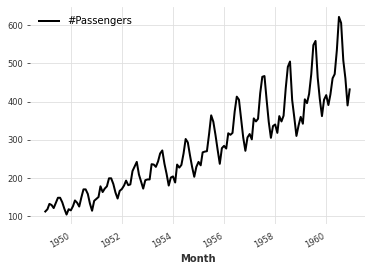

In [3]:
series.plot()

### 数据分割

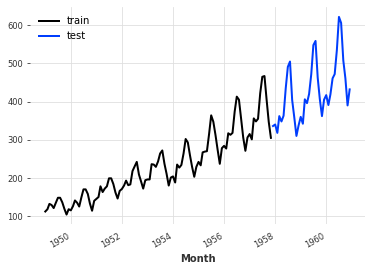

In [5]:
train, test = series.split_before(0.75)
train.plot(label = "train")
test.plot(label = "test")

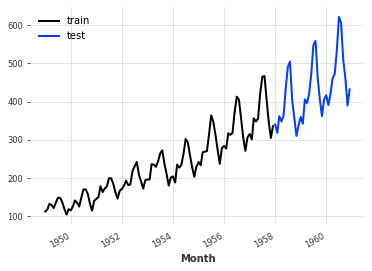

In [6]:
train, test = series[:-36], series[-36:]
train.plot(label = "train")
test.plot(label = "test")

### 算术运算

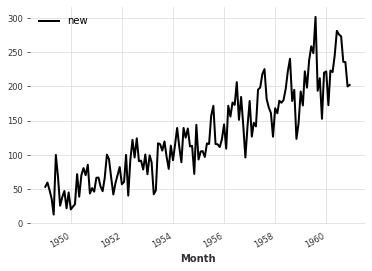

In [36]:
series_noise = TimeSeries.from_times_and_values(
    series.time_index,
    np.random.randn(len(series)),
)
series_new = (series / 2) + 20 * series_noise - 10
# series.plot(label = "raw")
# series_noise.plot(label = "noise")
series_new.plot(label = "new")

### 拼接 Stacking

In [28]:
series_stacked = (series / 50).stack(series_noise)
series_stacked

<TimeSeries (DataArray) (Month: 144, component: 2, sample: 1)>
array([[[ 2.24      ],
        [-1.07596454]],

       [[ 2.36      ],
        [ 0.01751416]],

       [[ 2.64      ],
        [ 0.45519077]],

       [[ 2.58      ],
        [-1.35381686]],

       [[ 2.42      ],
        [-0.04556075]],

       [[ 2.7       ],
        [ 0.38016002]],

       [[ 2.96      ],
        [-0.02041289]],
...
       [[10.7       ],
        [-0.93635739]],

       [[12.44      ],
        [ 0.05052889]],

       [[12.12      ],
        [-0.87130209]],

       [[10.16      ],
        [ 0.12718169]],

       [[ 9.22      ],
        [-1.36223943]],

       [[ 7.8       ],
        [ 0.36249236]],

       [[ 8.64      ],
        [-1.18363475]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers' '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [29]:
series_stacked.columns

Index(['#Passengers', '0'], dtype='object', name='component')

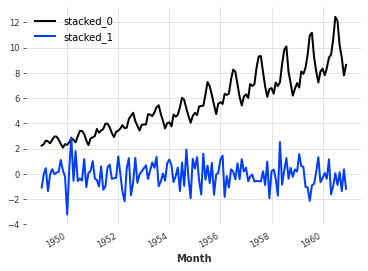

In [31]:
# series.plot(label = "raw")
series_stacked.plot(label = "stacked")

### Mapping

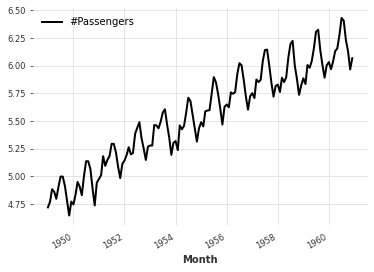

In [25]:
series_log = series.map(np.log)
# series.plot(label = "raw")
series_log.plot()

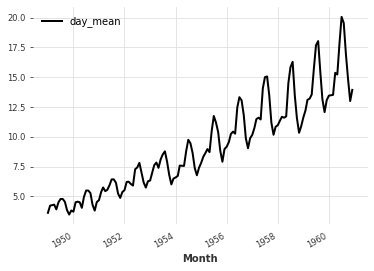

In [23]:
series_day_mean = series.map(lambda ts, x: x / ts.days_in_month)
# series.plot(label = "raw")
series_day_mean.plot(label = "day_mean")

### 添加时间属性特征

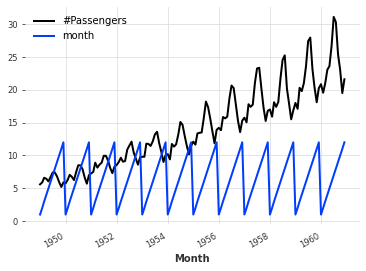

In [45]:
series_month = (series / 20).add_datetime_attribute("month")
series_month.plot()

In [46]:
series_month

<TimeSeries (DataArray) (Month: 144, component: 2, sample: 1)>
array([[[ 5.6 ],
        [ 1.  ]],

       [[ 5.9 ],
        [ 2.  ]],

       [[ 6.6 ],
        [ 3.  ]],

       [[ 6.45],
        [ 4.  ]],

       [[ 6.05],
        [ 5.  ]],

       [[ 6.75],
        [ 6.  ]],

       [[ 7.4 ],
        [ 7.  ]],
...
       [[26.75],
        [ 6.  ]],

       [[31.1 ],
        [ 7.  ]],

       [[30.3 ],
        [ 8.  ]],

       [[25.4 ],
        [ 9.  ]],

       [[23.05],
        [10.  ]],

       [[19.5 ],
        [11.  ]],

       [[21.6 ],
        [12.  ]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers' 'month'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

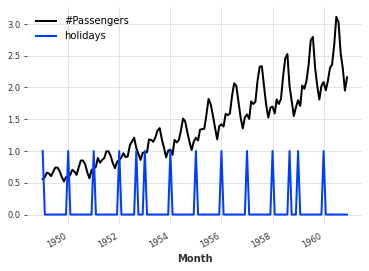

In [44]:
series_holidays = (series / 200).add_holidays("US")
series_holidays.plot()

In [47]:
series_holidays

<TimeSeries (DataArray) (Month: 144, component: 2, sample: 1)>
array([[[0.56 ],
        [1.   ]],

       [[0.59 ],
        [0.   ]],

       [[0.66 ],
        [0.   ]],

       [[0.645],
        [0.   ]],

       [[0.605],
        [0.   ]],

       [[0.675],
        [0.   ]],

       [[0.74 ],
        [0.   ]],
...
       [[2.675],
        [0.   ]],

       [[3.11 ],
        [0.   ]],

       [[3.03 ],
        [0.   ]],

       [[2.54 ],
        [0.   ]],

       [[2.305],
        [0.   ]],

       [[1.95 ],
        [0.   ]],

       [[2.16 ],
        [0.   ]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers' 'holidays'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### 差分

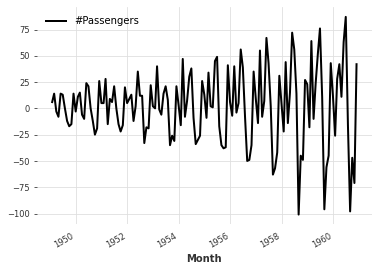

In [48]:
series_diff = series.diff()
series_diff.plot()

### 缺失值填充

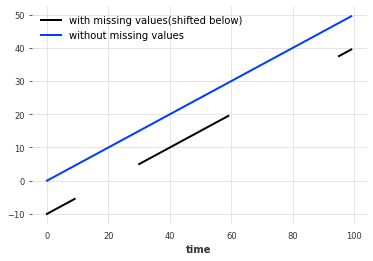

In [55]:
# 含有缺失值的序列
values = np.arange(50, step = 0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_with_missing = TimeSeries.from_values(values)
series_with_missing_shifted = series_with_missing - 10
series_with_missing_shifted.plot(label = "with missing values(shifted below)")

# 缺失值填充后的序列
series_fill_missing = fill_missing_values(series_with_missing)
series_fill_missing.plot(label = "without missing values")

### 训练数据和验证数据创建

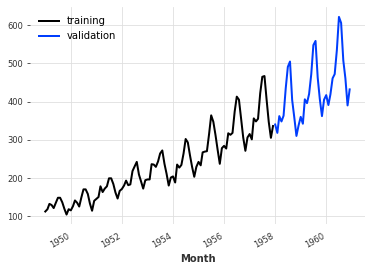

In [56]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label = "training")
val.plot(label = "validation")

## 预测模型

### NaiveSeasonal(1)

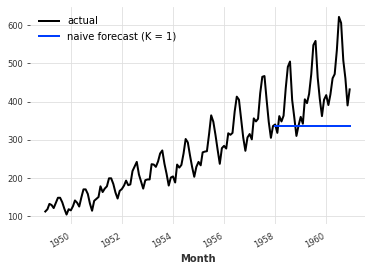

In [74]:
from darts.models import NaiveSeasonal

# data
train, val = series.split_before(pd.Timestamp("19580101"))

# model
naive_model = NaiveSeasonal(K = 1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label = "actual")
naive_forecast.plot(label = "naive forecast (K = 1)")

#### 季节性分析

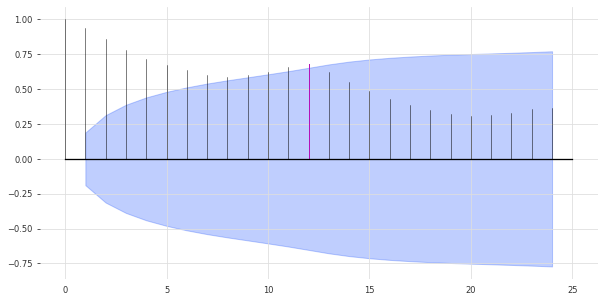

In [71]:
from darts.utils.statistics import plot_acf, check_seasonality

# 假设季节周期为 12 个月
plot_acf(train, m = 12, alpha = 0.05)

In [73]:
# 季节性检验
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m = m, alpha = 0.05)
    if is_seasonal:
        print(f"There is seasonality of order {period}.")

There is seasonality of order 12.


### NavieSeasonal(12)

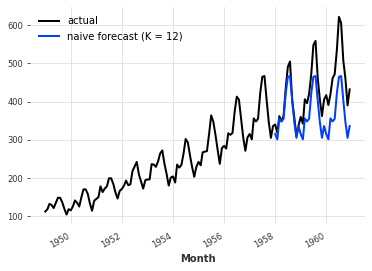

In [76]:
from darts.models import NaiveSeasonal

# data
train, val = series.split_before(pd.Timestamp("19580101"))

# model
naive_seasonal_model = NaiveSeasonal(K = 12)
naive_seasonal_model.fit(train)
naive_seasonal_forecast = naive_seasonal_model.predict(36)

series.plot(label = "actual")
naive_seasonal_forecast.plot(label = "naive forecast (K = 12)")

### NaiveDrift

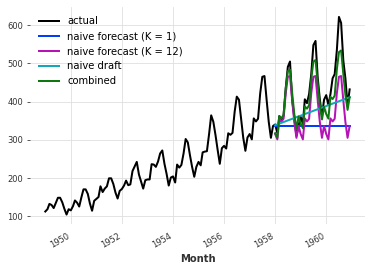

In [80]:
from darts.models import NaiveDrift

# data
train, val = series.split_before(pd.Timestamp("19580101"))

# model
naive_drift_model = NaiveDrift()
naive_drift_model.fit(train)
naive_drift_forecast = naive_drift_model.predict(36)

combine_forecast = naive_drift_forecast + naive_seasonal_forecast - train.last_value()

series.plot(label = "actual")
naive_forecast.plot(label = "naive forecast (K = 1)")
naive_seasonal_forecast.plot(label = "naive forecast (K = 12)")
naive_drift_forecast.plot(label = "naive draft")
combine_forecast.plot(label = "combined")

### 计算误差

In [81]:
from darts.metrics import mape

mape_metric = mape(series, combine_forecast)
print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%."
    .format(mape_metric)
)

Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.


### 模型选择

In [82]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}".format(model, mape(val, forecast)))

eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.11
model (T)BATS obtains MAPE: 5.87
model Auto-ARIMA obtains MAPE: 11.65
model Theta(2) obtains MAPE: 8.15


### 超参数调优

In [83]:
# Theta 模型超参数调优
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    forecast_theta = model.predict(len(val))
    res = mape(val, forecast_theta)
    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
forecast_best_theta = best_theta_model.predict(len(val))
print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, forecast_best_theta), best_theta
    )
)

The MAPE is: 4.40, with theta = -3.5102040816326543.


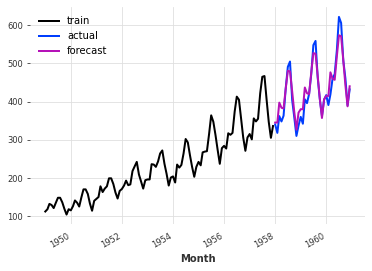

In [84]:
train.plot(label = "train")
val.plot(label = "actual")
forecast_best_theta.plot(label = "forecast")

### 回测

#### Theta

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 7.70


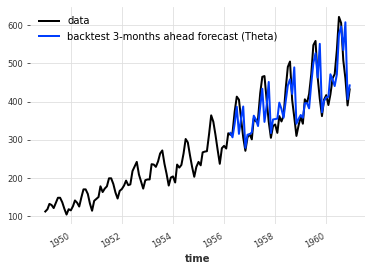

In [85]:
historical_forcast_theta = best_theta_model.historical_forecasts(
    series,
    start = 0.6,
    forecast_horizon = 3,
    verbose = True,
)
series.plot(label = "data")
historical_forcast_theta.plot(label = "backtest 3-months ahead forecast (Theta)")
print("MAPE = {:.2f}".format(mape(historical_forcast_theta, series)))

  0%|          | 0/57 [00:00<?, ?it/s]

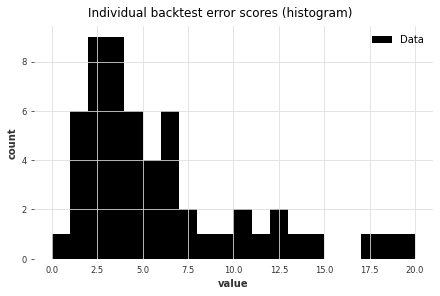

In [87]:
from darts.utils.statistics import plot_hist

best_theta_model = Theta(best_theta)
raw_errors = best_theta_model.backtest(
    series,
    start = 0.6,
    forecast_horizon = 3,
    metric = mape,
    reduction = None,
    verbose = True,
)

plot_hist(
    raw_errors,
    bins = np.arange(0, max(raw_errors), 1),
    title = "Individual backtest error scores (histogram)"
)

In [88]:
average_error = best_theta_model.backtest(
    series,
    start = 0.6,
    forecast_horizon = 3,
    metric = mape,
    reduction = np.mean,  # this is actually the default
    verbose = True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/57 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 6.36


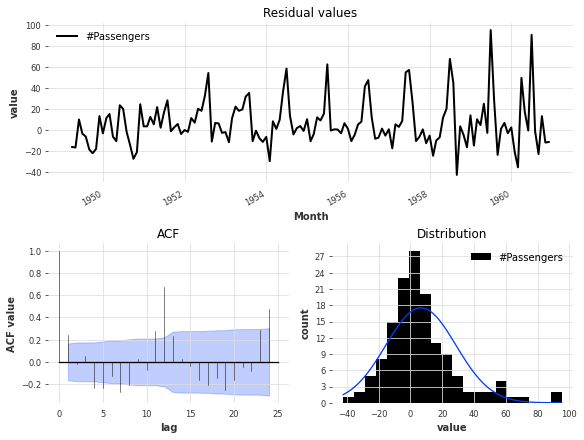

In [108]:
from darts.utils.statistics import plot_residuals_analysis

# 残差分析
plot_residuals_analysis(
    best_theta_model.residuals(series)
)

#### Exponential Smoothing

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 4.45%


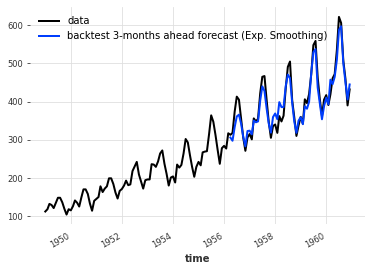

In [106]:
model_es = ExponentialSmoothing()
historical_forcast_es = model_es.historical_forecasts(
    series,
    start = 0.6,
    forecast_horizon = 3,
    verbose = True,
)

series.plot(label = "data")
historical_forcast_es.plot(label = "backtest 3-months ahead forecast (Exp. Smoothing)")
print("MAPE = {:.2f}%".format(mape(historical_forcast_es, series)))

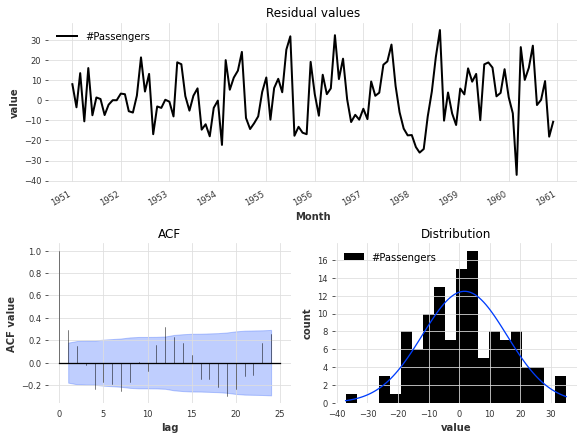

In [107]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(model_es.residuals(series))

## 机器学习

### 数据

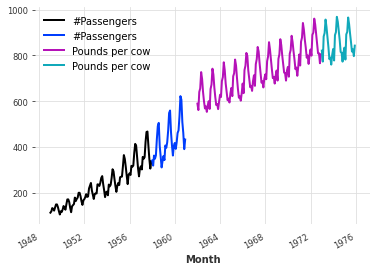

In [110]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

# data
series_air = AirPassengersDataset().load().astype(np.float32)
series_milk = MonthlyMilkDataset().load().astype(np.float32)

# data split
train_air, val_air = series_air[:-36], series_air[-36:]
train_milk, val_milk = series_milk[:-36], series_milk[-36:]

# data plot
train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

### 数据归一化

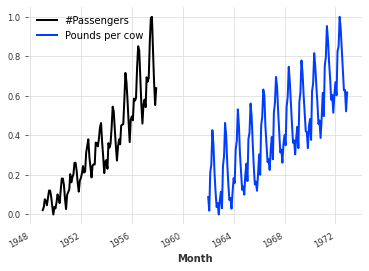

In [111]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_air_scaled, train_milk_scaled = scaler.fit_transform([train_air, train_milk])

train_air_scaled.plot()
train_milk_scaled.plot()

### N-BEATS

In [112]:
from darts.models import NBEATSModel

model = NBEATSModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    random_state = 42,
)
model.fit(
    [train_air_scaled, train_milk_scaled],
    epochs = 50,
    verbose = True,
)

2022-11-20 12:31:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 12:31:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 12:31:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 12:31:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 12:31:10 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

<Figure size 720x432 with 0 Axes>

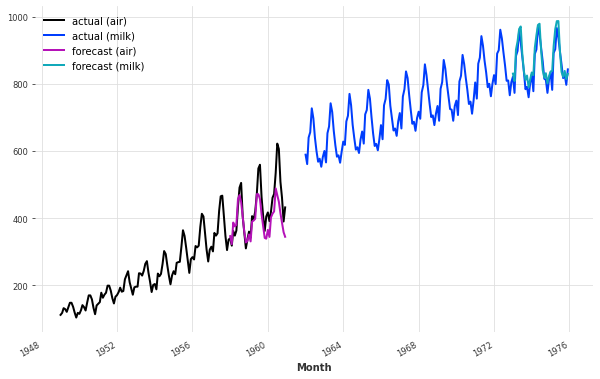

In [116]:
pred_air = model.predict(series = train_air_scaled, n = 36)
pred_milk = model.predict(series = train_milk_scaled, n = 36)
plt.figure(figsize = (10, 6))
# pred_air.plot(label = "scaled forecast (air)")
# pred_milk.plot(label = "scaled forecast (milk)")

# scale back
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])
# final predict plot
plt.figure(figsize = (10, 6))
series_air.plot(label = "actual (air)")
series_milk.plot(label = "actual (milk)")
pred_air.plot(label = "forecast (air)")
pred_milk.plot(label = "forecast (milk)")

### 协变量

#### 协变量构造

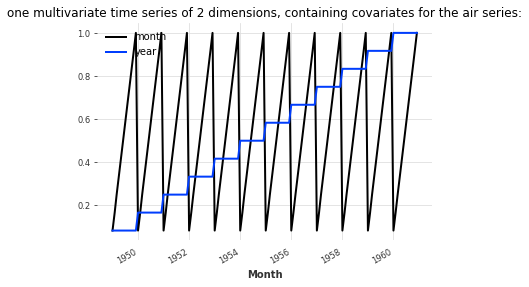

In [120]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

air_covs = concatenate([
    dt_attr(series_air.time_index, "month", dtype = np.float32) / 12,
    (dt_attr(series_air.time_index, "year", dtype = np.float32) - 1948) / 12,
], axis = "component")
milk_covs = concatenate([
    dt_attr(series_milk.time_index, "month", dtype = np.float32) / 12,
    (dt_attr(series_milk.time_index, "year", dtype = np.float32) - 1962) / 12,
], axis = "component")

air_covs.plot()
plt.title("one multivariate time series of 2 dimensions, containing covariates for the air series:");

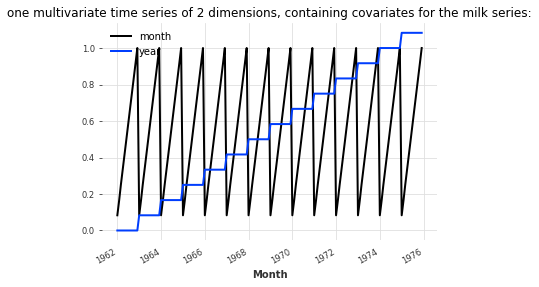

In [121]:
milk_covs.plot()
plt.title("one multivariate time series of 2 dimensions, containing covariates for the milk series:");

#### 协变量模型

In [123]:
model = NBEATSModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    random_state = 42,
)
model.fit(
    [train_air_scaled, train_milk_scaled],
    past_covariates = [air_covs, milk_covs],
    epochs = 50,
    verbose = True,
)

2022-11-20 15:21:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 15:21:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 15:21:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 15:21:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 15:21:43 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

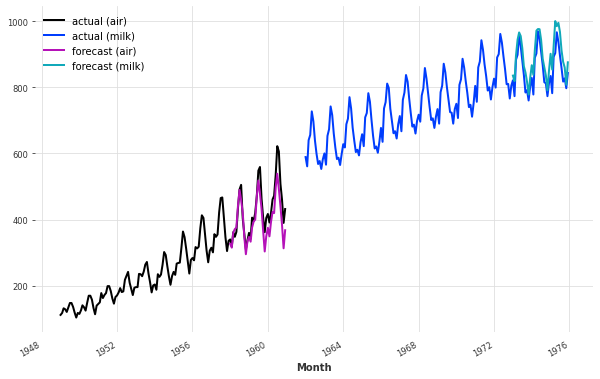

In [124]:
pred_air = model.predict(series = train_air_scaled, past_covariates = air_covs, n =36)
pred_milk = model.predict(series = train_milk_scaled, past_covariates = milk_covs, n = 36)

# scale back
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize = (10, 6))
series_air.plot(label = "actual (air)")
series_milk.plot(label = "actual (milk)")
pred_air.plot(label = "forecast (air)")
pred_milk.plot(label = "forecast (milk)")

#### 协变量 Encoders

2022-11-20 16:18:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 16:18:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 16:18:23 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 16:18:23 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 16:18:23 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

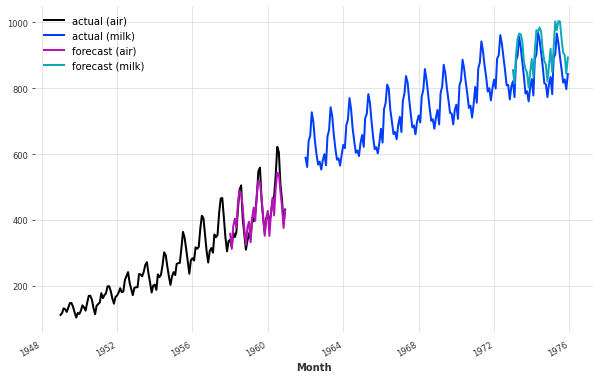

In [129]:
encoders = {
    "cyclic": {
        "future": ["month"],
    },
    "datetime_attribute": {
        "future": ["hour", "dayofweek"],
    },
    "position": {
        "past": ["absolute"],
        "future": ["relative"],
    },
    "custom": {
        "past": [lambda idx: (idx.year - 1950) / 50],
    },
    "transformer": Scaler(),
}

encoders = {
    "datetime_attribute": {
        "past": ["month", "year"]
    }, 
    "transformer": Scaler()
}
model = NBEATSModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    add_encoders = encoders,
    random_state = 42,
)
model.fit(
    [train_air_scaled, train_milk_scaled],
    epochs = 50,
    verbose = True,
)

pred_air = model.predict(series = train_air_scaled, n =36)
pred_milk = model.predict(series = train_milk_scaled, n = 36)

# scale back
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize = (10, 6))
series_air.plot(label = "actual (air)")
series_milk.plot(label = "actual (milk)")
pred_air.plot(label = "forecast (air)")
pred_milk.plot(label = "forecast (milk)")

### 回归预测模型

In [130]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

air_covs = concatenate([
    dt_attr(series_air.time_index, "month", dtype = np.float32) / 12,
    (dt_attr(series_air.time_index, "year", dtype = np.float32) - 1948) / 12,
], axis = "component")
milk_covs = concatenate([
    dt_attr(series_milk.time_index, "month", dtype = np.float32) / 12,
    (dt_attr(series_milk.time_index, "year", dtype = np.float32) - 1962) / 12,
], axis = "component")

model = RegressionModel(
    lags = 72,
    lags_future_covariates = [-6, 0],
    model = BayesianRidge()
)
model.fit(
    [train_air_scaled, train_milk_scaled],
    future_covariates = [air_covs, milk_covs]
)

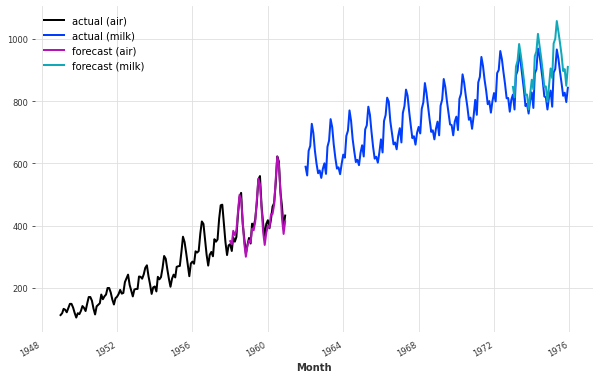

In [131]:
pred_air, pred_milk = model.predict(
    series = [train_air_scaled, train_milk_scaled],
    future_covariates = [air_covs, milk_covs],
    n = 36,
)

# scale back:
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize = (10, 6))
series_air.plot(label = "actual (air)")
series_milk.plot(label = "actual (milk)")
pred_air.plot(label = "forecast (air)")
pred_milk.plot(label = "forecast (milk)")

In [132]:
mape([series_air, series_milk], [pred_air, pred_milk])

[3.4387070101832964, 5.86561832479412]

In [133]:
mape([series_air, series_milk], [pred_air, pred_milk], inter_reduction = np.mean)

4.652162667488708

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 3.66


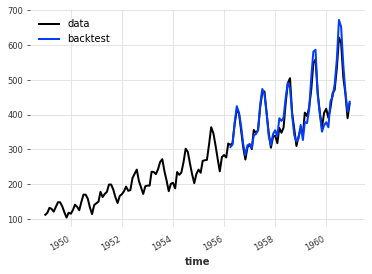

In [152]:
bayes_ridge_model = RegressionModel(
    lags = 72,
    lags_future_covariates = [0],
    model = BayesianRidge(),
)
backtest = bayes_ridge_model.historical_forecasts(
    series_air,
    future_covariates = air_covs,
    start = 0.6,
    forecast_horizon = 3,
    verbose = True,
)
print("MAPE = {:.2f}".format(mape(backtest, series_air)))

series_air.plot(label = "data")
backtest.plot(label = "backtest")

### 概率预测

#### Exponential Smoothing

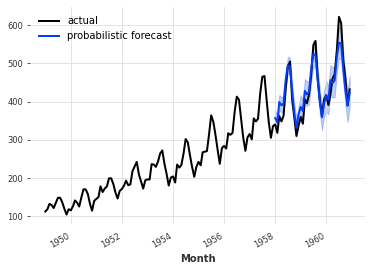

In [137]:
from darts.models import ExponentialSmoothing

model_es = ExponentialSmoothing()
model_es.fit(train)
probabilistic_forecast = model_es.predict(len(val), num_samples = 500)

series.plot(label = "actual")
probabilistic_forecast.plot(label = "probabilistic forecast")
plt.legend()
plt.show()

#### TNC

In [138]:
from darts.models import TCNModel
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    random_state = 42,
    likelihood = LaplaceLikelihood(),
)
model.fit(train_air_scaled, epochs = 400, verbose = True)

2022-11-20 16:39:26 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 16:39:26 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 16:39:26 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 16:39:26 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 16:39:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 166   
----------------------------------------------------
166       Trainable params
0         Non-trainable params
166       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

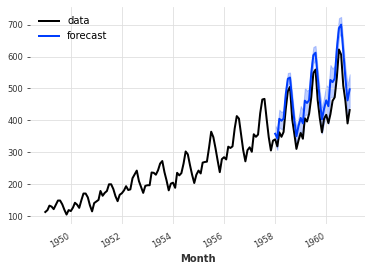

In [139]:
pred = model.predict(n = 36, num_samples = 500)

# scale back
pred = scaler.inverse_transform(pred)

series_air.plot(label = "data")
pred.plot(label = "forecast")

In [141]:
model = TCNModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    random_state = 42,
    likelihood = LaplaceLikelihood(prior_b = 0.1),
)
model.fit(train_air_scaled, epochs = 400, verbose = True)

2022-11-20 16:43:14 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 16:43:14 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 16:43:14 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 16:43:14 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 16:43:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 166   
----------------------------------------------------
166       Trainable params
0         Non-trainable params
166       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

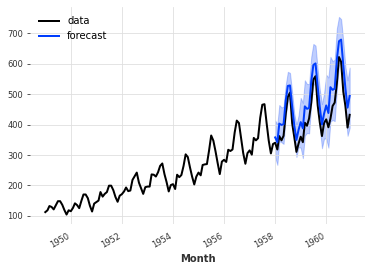

In [142]:
pred = model.predict(n = 36, num_samples = 500)

# scale back
pred = scaler.inverse_transform(pred)

series_air.plot(label = "data")
pred.plot(label = "forecast")

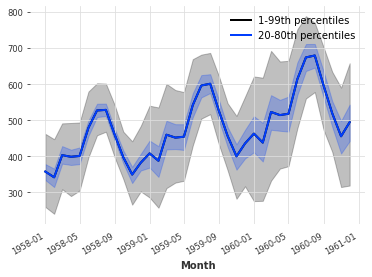

In [143]:
pred.plot(low_quantile=0.01, high_quantile=0.99, label="1-99th percentiles")
pred.plot(low_quantile=0.2, high_quantile=0.8, label="20-80th percentiles")

## Ensembling 模型

### Naive Ensembling

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 11.88


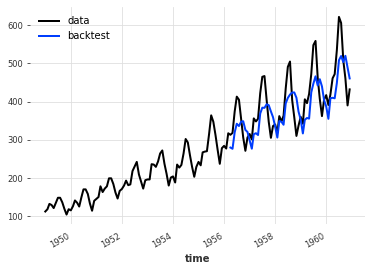

In [151]:
from darts.models import NaiveSeasonal
from darts.models import NaiveDrift
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models = models)

backtest = ensemble_model.historical_forecasts(
    series_air, 
    start = 0.6,
    forecast_horizon = 3,
    verbose = True,
)
print("MAPE = {:.2f}".format(mape(backtest, series_air)))

series_air.plot(label = "data")
backtest.plot(label = "backtest")

### Learned Ensembling

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 4.85


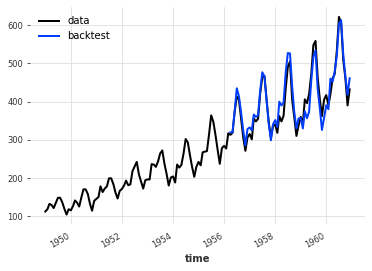

In [150]:
from darts.models import RegressionEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = RegressionEnsembleModel(
    forecasting_models = models,
    regression_train_n_points = 12,
)
backtest = ensemble_model.historical_forecasts(
    series_air,
    start = 0.6,
    forecast_horizon = 3,
    verbose = True
)

print("MAPE = {:.2f}".format(mape(backtest, series_air)))
series_air.plot(label = "data")
backtest.plot(label = "backtest")

In [156]:
ensemble_model.regression_model.model.coef_

AttributeError: 'NaiveEnsembleModel' object has no attribute 'regression_model'

## 滤波模型

### Kalman Filter

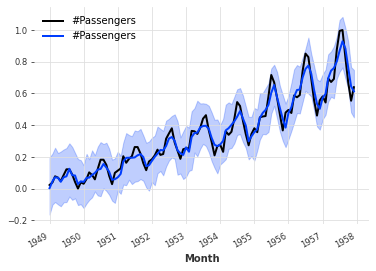

In [163]:
from darts.models import KalmanFilter

kf = KalmanFilter(dim_x=3)
kf.fit(train_air_scaled)
filtered_series = kf.filter(train_air_scaled, num_samples=100)

train_air_scaled.plot()
filtered_series.plot()

### Gaussian Processes

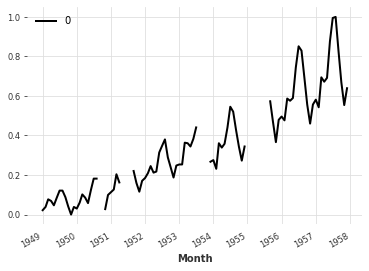

In [165]:
from darts.models import GaussianProcessFilter
from sklearn.gaussian_process.kernels import RBF

# create a series with holes:
values = train_air_scaled.values()
values[20:22] = np.nan
values[28:32] = np.nan
values[55:59] = np.nan
values[72:80] = np.nan
series_holes = TimeSeries.from_times_and_values(
    train_air_scaled.time_index, 
    values
)
series_holes.plot()

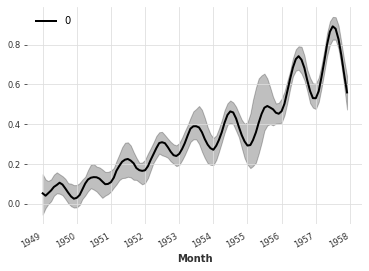

In [166]:
kernel = RBF()
gpf = GaussianProcessFilter(kernel = kernel, alpha = 0.1, normalize_y = True)
filtered_series = gpf.filter(series_holes, num_samples = 100)

filtered_series.plot()